<a href="https://colab.research.google.com/github/alimadani/Dimension_reduction/blob/master/DimentionReduction_Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimentional Reduction

## Why is Dimensionality Reduction required?


1.   Space required to store the data is reduced as the number of dimensions comes down
2.   Less dimensions lead to less computation/training time
3.   Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
4.  It takes care of multicollinearity by removing redundant features.
5.  It helps in visualizing data. It is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

**Dimensionality reduction can be done in two different ways:**


1.   By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
2.  By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

**Common Dimensionality Reduction Techniques**

*   Principal Component Analysis (PCA)
*   Independent Component Analysis
*   t- Distributed Stochastic Neighbor Embedding (t-SNE)
*   UMAP
*   Linear discriminant analysis





 # Dimensionality Reduction Visualizations


First, we need to import numpy, matplotlib, and scikit-learn and get the MNIST data. Scikit-learn already comes with the MNIST data (or will automatically download it for you) so we don’t have to deal with uncompressing it ourselves! Additionally, I’ve provided a function that will produce a nice visualization of our data.

In [0]:
import numpy as np

#from sklearn import manifold, datasets, decomposition, discriminant_analysis 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


To make sure that every single line will be  printed, even if they're in the same cell, we can use thf ollowing config:

In [0]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd

CCLE_exp = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML_Python_PMCRT/CCLE_ExpMat_Top500Genes.csv', index_col=0)
CCLE_pheno = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML_Python_PMCRT/CCLE_ExpMat_Pheno.csv', index_col=0)
####
print("shape of the expression dataframe:", CCLE_exp.shape)
print("shape of the expression dataframe:", CCLE_pheno.shape)
####
CCLE_exp = CCLE_exp.transpose()
n_samples, n_features = CCLE_exp.shape


CCLE_exp.shape

shape of the expression dataframe: (500, 550)
shape of the expression dataframe: (550, 17)


(550, 500)

In [0]:
#CCLE_pheno.iloc[0:4,0:4]
CCLE_pheno.columns.values

array(['cellid', 'tissueid', 'CCLE.cellid', 'link', 'CCLE.name',
       'Cell.line.primary.name', 'Cell.line.aliases', 'Gender',
       'Site.Primary', 'Histology', 'Hist.Subtype1', 'Notes', 'Source',
       'Expression.arrays', 'SNP.arrays', 'Oncomap',
       'Hybrid.Capture.Sequencing'], dtype=object)

In [0]:
import matplotlib.pyplot as plt

def embedding_plot(X,labels,title):
  tissuenames, indices = np.unique(labels, return_inverse=True)
  plt.scatter(X[:, 0], X[:, 1], c=indices, cmap='Spectral', s=15)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.grid(False)
  plt.colorbar(boundaries=np.arange((len(tissuenames)+1))-0.5, ticks=np.arange(len(tissuenames))
              ).set_ticklabels(np.ndarray.tolist(tissuenames))
  #plt.legend()
  plt.title(title, fontsize=24);

Using any of the dimensionality reduction techniques that we’ve discussed in scikit-learn is trivial! We can get PCA working in just a few lines of code!

## PCA

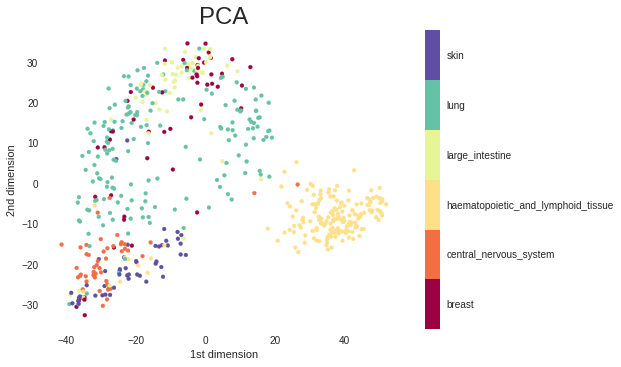

In [0]:
from sklearn import decomposition

CCLE_pca = decomposition.PCA(n_components=2).fit_transform(CCLE_exp)

embedding_plot(CCLE_pca, CCLE_pheno.loc[:,"tissueid"].values,"PCA")

# ICA

   * If two variables are independent, they are uncorreltaed but the reverse is not true.
  

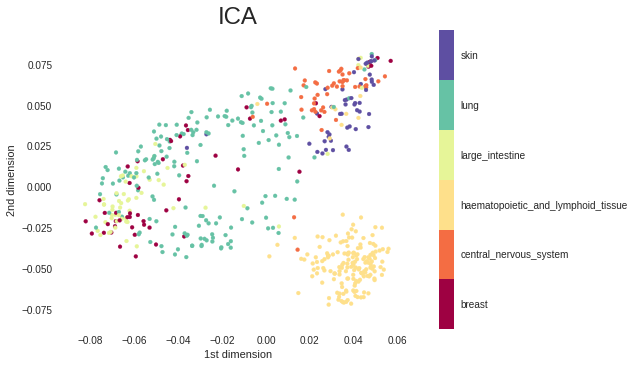

In [0]:
CCLE_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(CCLE_exp) 

embedding_plot(CCLE_ica,CCLE_pheno.loc[:,"tissueid"].values,"ICA")

## t-SNE
Finally, let’s use t-SNE to visualize the MNIST data. We’re initializing the embedding to use PCA (in accordance with Laurens Van Der Maaten’s recommendations). Unlike LDA, t-SNE is completely unsupervised.

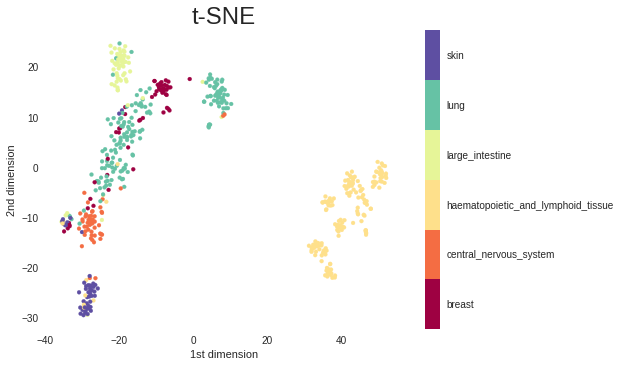

In [0]:
from sklearn import manifold

CCLE_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(CCLE_exp)

embedding_plot(CCLE_tsne,CCLE_pheno.loc[:,"tissueid"].values,"t-SNE")

## UMAP

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


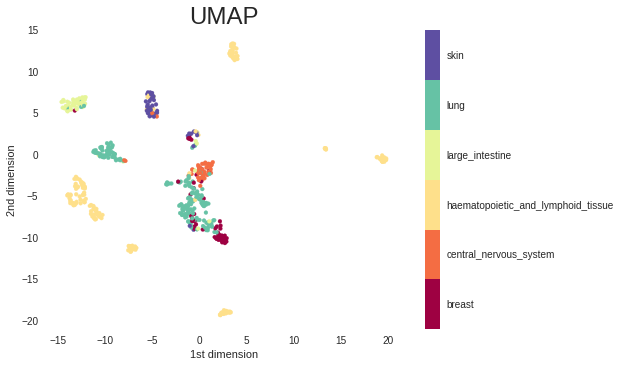

In [0]:
import umap

CCLE_umap = umap.UMAP(n_neighbors=5, min_dist=0.4, n_components=2).fit_transform(CCLE_exp)

embedding_plot(CCLE_umap,CCLE_pheno.loc[:,"tissueid"].values,"UMAP")

## LDA

Now let’s use LDA  to visualize the same data. Just like PCA, using LDA in scikit-learn is very easy! Notice that we have to also give the class labels since LDA is supervised!

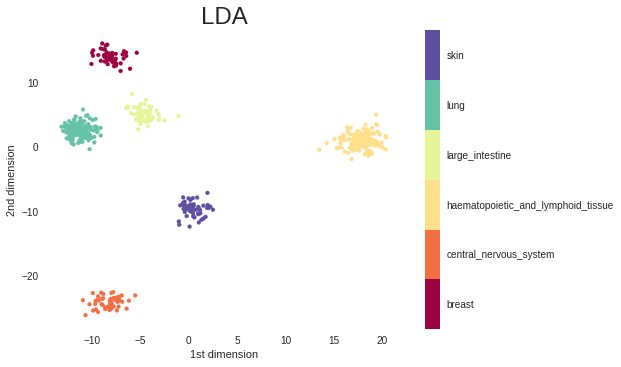

In [0]:
from sklearn import discriminant_analysis 

CCLE_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(CCLE_exp, CCLE_pheno.loc[:,"tissueid"].values)

embedding_plot(CCLE_lda, CCLE_pheno.loc[:,"tissueid"].values,"LDA")